<a href="https://colab.research.google.com/github/farimairanbakhsh/MachineLearning2023/blob/main/Chapter1/miniproject2/mini_project_2_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from mlxtend.plotting import plot_decision_regions

import __main__

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1h1W7R-sTNoGeXsOJ_Fm8pwRHK4Qrw4Aw

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1h1W7R-sTNoGeXsOJ_Fm8pwRHK4Qrw4Aw
To: /content/Perceptron.csv
100% 17.3k/17.3k [00:00<00:00, 30.9MB/s]


In [ ]:
df = pd.read_csv('Perceptron.csv')
df.head()

,x1,x2,y
0,1.028503,0.973218,-1.0
1,0.252505,0.955872,-1.0
2,1.508085,0.672058,-1.0
3,1.940002,1.721370,-1.0
4,-1.048819,-0.844999,1.0


In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]
y = np.where(y == -1, 0, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
x_train=np.asarray(x_train)

In [ ]:
y_train=np.array(y_train)

y_train=y_train.reshape(-1,1)

y_train.shape,x_train.shape

((320, 1), (320, 2))

In [ ]:
#activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    pass

In [ ]:
#loss functions
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

In [ ]:
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat<t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

In [ ]:
class Neuron:

    def __init__(self, in_features, af=None, loss_fn=mse, n_iter=100, eta=0.1, verbose=True):
        self.in_features = in_features
        # weight & bias
        self.w = np.random.randn(in_features, 1)
        self.b = 0.5
        self.af = af
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad, self.b_grad = None, None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose

    def predict(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.b
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            y_hat = self.predict(x)
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            self.gradient(x, y, y_hat)
            self.gradient_descent()
            if self.verbose & (i % 10 == 0):
                print(f'Iter={i}, Loss={loss.mean():.4f}')

    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)
        self.b_grad = (y_hat - y).mean()

    def gradient_descent(self):
        self.w -= self.eta * self.w_grad
        self.b -= self.eta * self.b_grad

    def __repr__(self):
        return f'Neuron({self.in_features}, {self.af.__name__})'

    def parameters(self):
        return {'w': self.w, 'b': self.b}

In [ ]:
neuron = Neuron(in_features=2, af=sigmoid, loss_fn=bce, n_iter=100, eta=0.1, verbose=True)
neuron.fit(x_train, y_train)
neuron.parameters()

Iter=0, Loss=1.6179
Iter=10, Loss=0.7447
Iter=20, Loss=0.4076
Iter=30, Loss=0.2694
Iter=40, Loss=0.2000
Iter=50, Loss=0.1592
Iter=60, Loss=0.1325
Iter=70, Loss=0.1138
Iter=80, Loss=0.1000
Iter=90, Loss=0.0893


{'w': array([[-0.79808152],
        [-2.0276887 ]]),
 'b': 0.1598341503434096}

In [ ]:
y_hat = neuron.predict(x_test)
accuracy(y_test[:, None], y_hat, t=0.5)

1.0

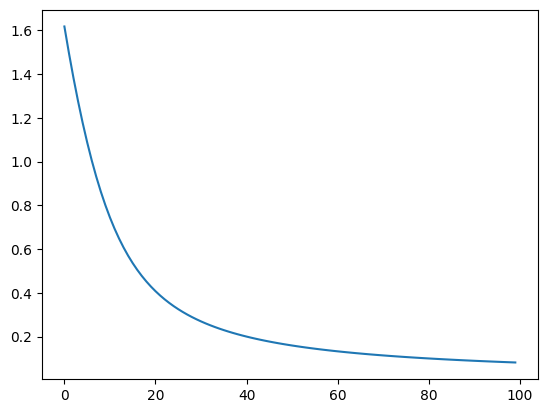

In [ ]:
plt.plot(neuron.loss_hist)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_train=np.asarray(x_train)

<Axes: >

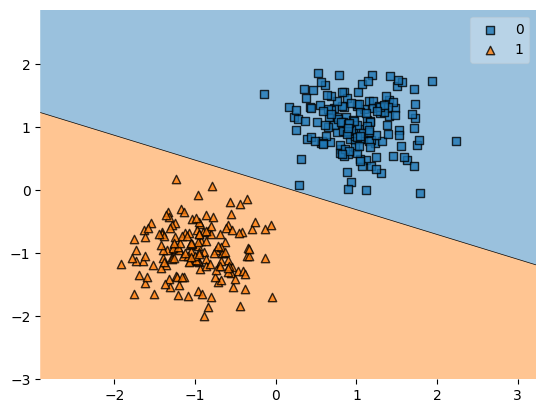

In [ ]:
plot_decision_regions(x_train, y_train, clf=neuron)

In [ ]:
class Neuron:

    def __init__(self, in_features, af=None, loss_fn=mse, n_iter=100, eta=0.1, verbose=True):
        self.in_features = in_features
        # weight & bias
        self.w = np.random.randn(in_features, 1)
        self.b = 6
        self.af = af
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad, self.b_grad = None, None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose

    def predict(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.b
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            y_hat = self.predict(x)
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            self.gradient(x, y, y_hat)
            self.gradient_descent()
            if self.verbose & (i % 10 == 0):
                print(f'Iter={i}, Loss={loss.mean():.4f}')

    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)
        self.b_grad = (y_hat - y).mean()

    def gradient_descent(self):
        self.w -= self.eta * self.w_grad
        self.b -= self.eta * self.b_grad

    def __repr__(self):
        return f'Neuron({self.in_features}, {self.af.__name__})'

    def parameters(self):
        return {'w': self.w, 'b': self.b}

In [ ]:
neuron = Neuron(in_features=2, af=sigmoid, loss_fn=bce, n_iter=100, eta=0.1, verbose=True)
neuron.fit(x_train, y_train)
neuron.parameters()

Iter=0, Loss=2.6764
Iter=10, Loss=1.9056
Iter=20, Loss=1.2141
Iter=30, Loss=0.7251
Iter=40, Loss=0.4540
Iter=50, Loss=0.3106
Iter=60, Loss=0.2296
Iter=70, Loss=0.1798
Iter=80, Loss=0.1467
Iter=90, Loss=0.1236


{'w': array([[-3.0686377 ],
        [-2.50747621]]),
 'b': 3.4136654571664766}

In [ ]:
y_hat = neuron.predict(x_test)
accuracy(y_test[:, None], y_hat, t=0.5)

0.975

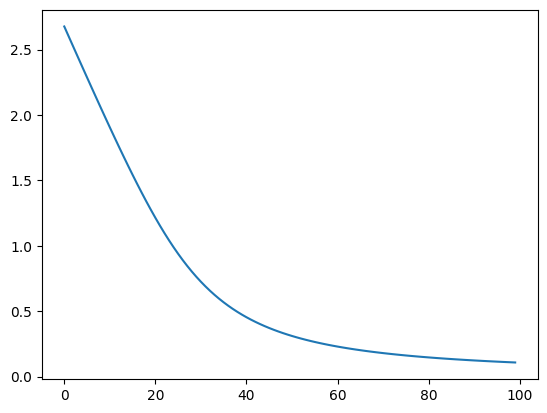

In [ ]:
plt.plot(neuron.loss_hist)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_train=np.asarray(x_train)

<Axes: >

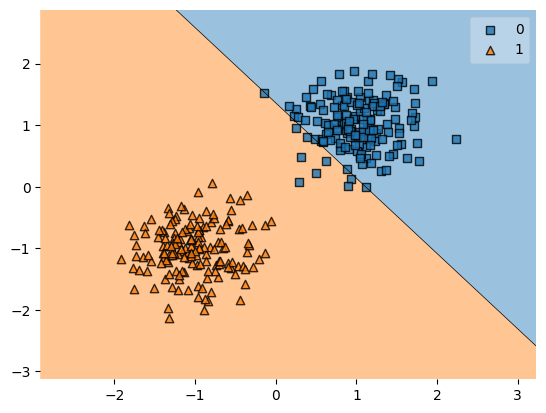

In [ ]:
plot_decision_regions(x_train, y_train, clf=neuron)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
x_train=np.asarray(x_train)

In [ ]:
y_train=np.array(y_train)

y_train=y_train.reshape(-1,1)

y_train.shape,x_train.shape

((320, 1), (320, 2))

In [ ]:
class Neuron:

    def __init__(self, in_features, af=None, loss_fn=mse, n_iter=100, eta=0.1, verbose=True):
        self.in_features = in_features
        # weight & bias
        self.w = np.random.randn(in_features, 1)
        self.b = 0
        self.af = af
        self.loss_fn = loss_fn
        self.loss_hist = []
        self.w_grad, self.b_grad = None, None
        self.n_iter = n_iter
        self.eta = eta
        self.verbose = verbose

    def predict(self, x):
        # x: [n_samples, in_features]
        y_hat = x @ self.w + self.b
        y_hat = y_hat if self.af is None else self.af(y_hat)
        return y_hat

    def fit(self, x, y):
        for i in range(self.n_iter):
            y_hat = self.predict(x)
            loss = self.loss_fn(y, y_hat)
            self.loss_hist.append(loss)
            self.gradient(x, y, y_hat)
            self.gradient_descent()
            if self.verbose & (i % 10 == 0):
                print(f'Iter={i}, Loss={loss.mean():.4f}')

    def gradient(self, x, y, y_hat):
        self.w_grad = (x.T @ (y_hat - y)) / len(y)
        self.b_grad = (y_hat - y).mean()

    def gradient_descent(self):
        self.w -= self.eta * self.w_grad
        self.b -= self.eta * self.b_grad

    def __repr__(self):
        return f'Neuron({self.in_features}, {self.af.__name__})'

    def parameters(self):
        return {'w': self.w, 'b': self.b}

In [ ]:
neuron = Neuron(in_features=2, af=sigmoid, loss_fn=bce, n_iter=100, eta=0.1, verbose=True)
neuron.fit(x_train, y_train)
neuron.parameters()

Iter=0, Loss=0.6378
Iter=10, Loss=0.3643
Iter=20, Loss=0.2489
Iter=30, Loss=0.1886
Iter=40, Loss=0.1522
Iter=50, Loss=0.1279
Iter=60, Loss=0.1107
Iter=70, Loss=0.0977
Iter=80, Loss=0.0877
Iter=90, Loss=0.0796


{'w': array([[-0.83111323],
        [-2.12384767]]),
 'b': -0.0026983614755450697}

In [ ]:
y_hat = neuron.predict(x_test)
accuracy(y_test[:, None], y_hat, t=0.5)

1.0

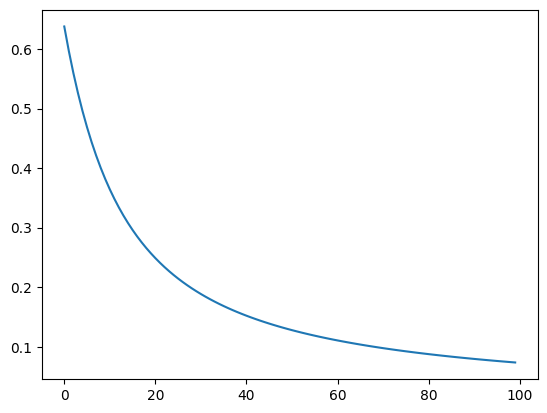

In [ ]:
plt.plot(neuron.loss_hist)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_train=np.asarray(x_train)

<Axes: >

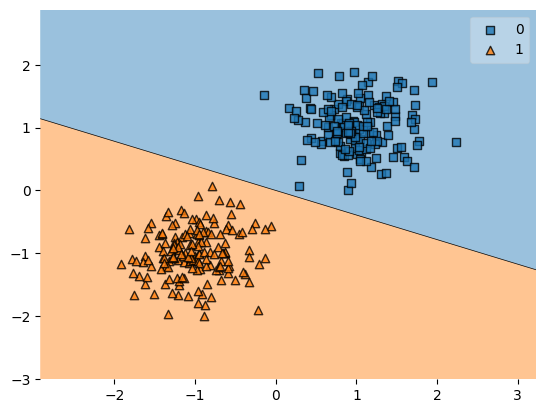

In [ ]:
plot_decision_regions(x_train, y_train, clf=neuron)